In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from sklearn.preprocessing import OneHotEncoder, scale, StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score,classification_report
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Bidirectional, LSTM, Reshape,TimeDistributed, GRU, concatenate, add,Input
import pickle
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# import data
df_training = pd.read_csv("../Resources/training_set_features.csv")
df_labels = pd.read_csv("../Resources/training_set_labels.csv")
df = df_labels.merge(df_training, on = "respondent_id", how = "inner")

In [3]:
# Clean feature and label dataset
df1 = df.drop(["health_insurance","employment_industry", "employment_occupation"], axis=1)
df2 = df1.dropna()

In [4]:
# Clean label dataset
df_y = df2.select_dtypes(include=['int64'])
df_y = df_y[["respondent_id","h1n1_vaccine"]]
df_y = np.array(df_y)

In [5]:
# Keep original features to the side 
df_original_features = df2.drop(["h1n1_vaccine", "seasonal_vaccine"], axis=1)

In [6]:
# Clean features dataset

# drop label columns
df_x = df2.drop(["h1n1_vaccine", "seasonal_vaccine"], axis=1)

# pull out respondent id, categorical string, and categorical number features
df_int = df_x.select_dtypes(include=["int64"])
df_categories = df_x.select_dtypes(include=['object'])
df_float = df_x.select_dtypes(include=['float64'])

# turn the above df's into arrays
int_array = np.array(df_int)
features_array = np.array(df_categories)
float_array = np.array(df_float)

# transform categorical strings into one hot encoded array
encoder = OneHotEncoder(sparse=False)
onehot = encoder.fit_transform(features_array)

# scale the features
df_features = np.concatenate((float_array, onehot),axis=1)

In [7]:
df_features

array([[1., 0., 0., ..., 0., 0., 1.],
       [3., 2., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 1.],
       [1., 2., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [8]:
# scale the features
min_max_scaler = MinMaxScaler()
df_features = min_max_scaler.fit_transform(df_features)

In [9]:
# concatenate the respondent id back to the scale feature array
df_features = np.concatenate((int_array,df_features),axis=1)

In [10]:
df_features

array([[0.00000000e+00, 3.33333333e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.33333333e-01, 5.00000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.67020000e+04, 6.66666667e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.67030000e+04, 3.33333333e-01, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.67060000e+04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [11]:
# Separate features and labels into training and test sets
X_train_master, X_test_master, y_train_master, y_test_master = train_test_split(df_features, df_y, random_state=42)

In [12]:
y_train_master[10]

array([14761,     0], dtype=int64)

In [13]:
X_train_master[10]

array([1.47610000e+04, 3.33333333e-01, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.50000000e-01,
       2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01,
       2.50000000e-01, 0.00000000e+00, 3.33333333e-01, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [14]:
X_train_master

array([[8.34500000e+03, 6.66666667e-01, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.51590000e+04, 3.33333333e-01, 5.00000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.17780000e+04, 3.33333333e-01, 5.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [7.32700000e+03, 0.00000000e+00, 5.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.15400000e+03, 6.66666667e-01, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.15010000e+04, 0.00000000e+00, 5.00000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [15]:
# Remove training labels for model fitting purposes
X_train = X_train_master[:,1:]
X_test = X_test_master[:,1:]
y_train = np.ravel(y_train_master[:,1:])
y_test = np.ravel(y_test_master[:,1:])

In [16]:
#Define Model Instances
model_optimal = RandomForestClassifier(n_estimators = 100, random_state=42)

#Fit Model
model_optimal.fit(X_train,y_train)

# Predict
y_model = model_optimal.predict(X_test)

#get accuracy score
print(accuracy_score(y_test, y_model))
# #Save Model
# filename = '../models/randomForestML.sav'
# joblib.dump(model_optimal, filename)

print("... Done ...")

0.8226430462227652
... Done ...


k: 1, Train/Test Score: 1.000/0.729
k: 3, Train/Test Score: 0.868/0.770
k: 5, Train/Test Score: 0.845/0.787
k: 7, Train/Test Score: 0.829/0.795
k: 9, Train/Test Score: 0.825/0.797
k: 11, Train/Test Score: 0.820/0.796
k: 13, Train/Test Score: 0.814/0.794
k: 15, Train/Test Score: 0.813/0.795
k: 17, Train/Test Score: 0.811/0.796
k: 19, Train/Test Score: 0.809/0.796
k: 21, Train/Test Score: 0.808/0.796
k: 23, Train/Test Score: 0.808/0.798
k: 25, Train/Test Score: 0.804/0.794
k: 27, Train/Test Score: 0.803/0.794
k: 29, Train/Test Score: 0.801/0.792


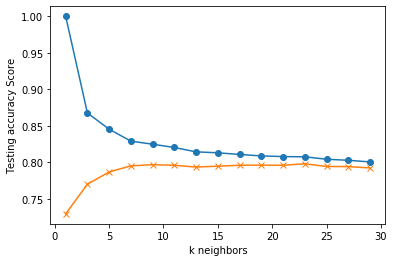

In [17]:
#KNN
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [20]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
print('k=30 Test Acc: %.3f' % knn.score(X_test, y_test))

k=30 Test Acc: 0.791


In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [22]:
model.fit(X_train, y_train)

GaussianNB()

In [23]:
y_model = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.7603339442068825